Nama : Durrotun Nafisah 

NIM : 190411100002

In [1]:
# import library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter
import sys
!pip install fuzzy-c-means
from fcmeans import FCM 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1


In [2]:
# load data
students_data = pd.read_csv("StudentsPerformance.csv")
students_data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# type data
students_data.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [4]:
# check missing value
students_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# check jumlah baris, kolom
baris, kolom = students_data.shape
'Baris : ', baris, 'Kolom : ', kolom  

('Baris : ', 1000, 'Kolom : ', 8)

In [6]:
# info data
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#cek duplikasi data ? 
students_data.duplicated().sum()

0

VISUALISASI DATA


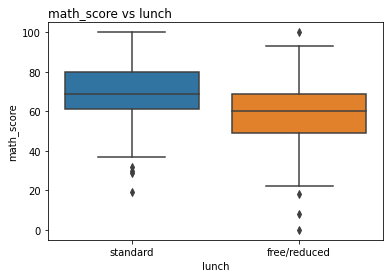

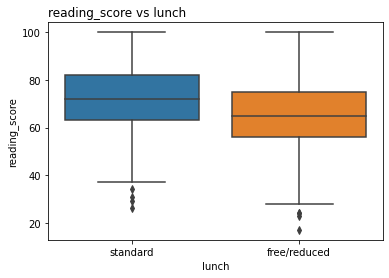

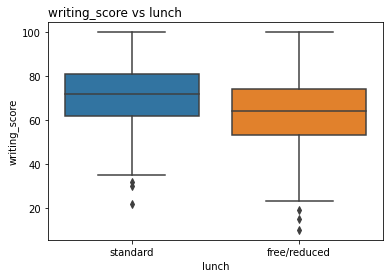

In [8]:
for item in students_data.columns[-3:]:
    sns.boxplot(x=students_data["lunch"], y=students_data[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

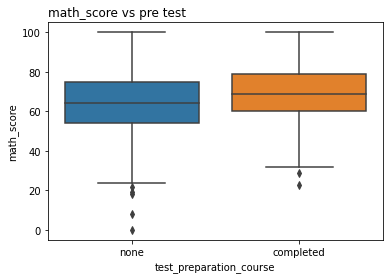

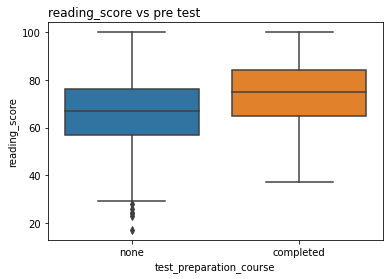

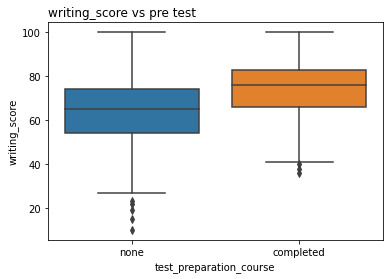

In [9]:
for item in students_data.columns[-3:]:
    sns.boxplot(x=students_data["test_preparation_course"], y=students_data[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


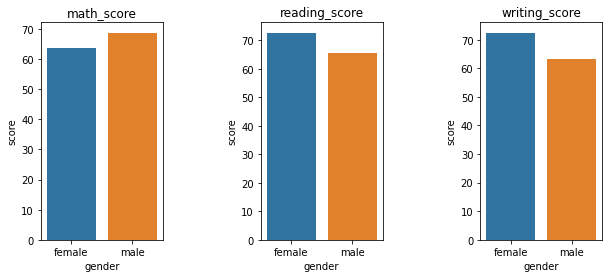

In [10]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = students_data.groupby("gender")[list(students_data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(students_data.columns[-3:])[idx])
    
plt.show()

### PREPROCESSING DATA

 TRANSFORMASI DATA

In [11]:
students_data_copy = students_data.copy()
students_data_copy = students_data_copy.drop(['gender'], axis=1)
students_data_copy = students_data_copy.drop(['race/ethnicity'], axis=1)
students_data_copy = students_data_copy.drop(['parental_level_of_education'], axis=1)
students_data_copy = students_data_copy.drop(['lunch'], axis=1)
students_data_copy = students_data_copy.drop(['test_preparation_course'], axis=1)

# students_data['gender'].replace({ 'male':0, 'female':1}, inplace=True)
# students_data['race/ethnicity'].replace({ 'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4}, inplace=True)
# students_data['parental_level_of_education'].replace({"bachelor's degree":0, "master's degree":1, "associate's degree":2, 'some college':3,'high school':4, 'some high school':5}, inplace=True)
# students_data['lunch'].replace({'free/reduced':0, 'standard':1 }, inplace=True)
# students_data['test_preparation_course'].replace({'none':0,'completed':1}, inplace=True)
# students_data.head()


NORMALISASI

In [12]:
# students_data_copy = students_data.copy()
from sklearn.preprocessing import MinMaxScaler
# NORMALIZE DATA
scaler = MinMaxScaler()
students_data_copy = pd.DataFrame(scaler.fit_transform(students_data_copy), columns = students_data_copy.columns)
students_data_copy

,math_score,reading_score,writing_score
0,0.72,0.662651,0.711111
1,0.69,0.879518,0.866667
2,0.90,0.939759,0.922222
3,0.47,0.481928,0.377778
4,0.76,0.734940,0.722222
...,...,...,...
995,0.88,0.987952,0.944444
996,0.62,0.457831,0.500000
997,0.59,0.650602,0.611111
998,0.68,0.734940,0.744444


# FCM

[0.47759674754829157, 0.40983839909458836, 0.3541514968747873, 0.3292320631170619, 0.28615386012728067, 0.25953423958833416, 0.28549224403442724, 0.28020974872811527, 0.28943407366769497]


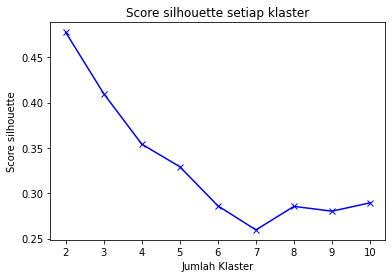

In [13]:
from sklearn.metrics import silhouette_score
#range dimulai dari 2 karena label tidak mungkin nilainya hanya 1 kategori

nilai_k = []
scr = []
students_data_array = np.array(students_data_copy)
for i in range(2,11):
  fcm = FCM(n_clusters=i, m=2, error=0.001, max_litter=100)
  fcm.fit(students_data_array)

  fcm_centers = fcm.centers
  fcm_labels = fcm.predict(students_data_array)

  score = silhouette_score(students_data_copy, fcm_labels)
  scr.append(score)
  nilai_k.append(i)
  

print(scr)
plt.plot(range(2,11), scr, 'bx-')
plt.title('Score silhouette setiap klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Score silhouette')
plt.savefig('Elbow K means')
plt.show()

In [14]:
# menghitung nilai silhoette score (diambil terbesar)
tbl_sil = pd.DataFrame({'Nilai K': nilai_k, 'Silhoette Score' : scr})
tbl_sil

,Nilai K,Silhoette Score
0,2,0.477597
1,3,0.409838
2,4,0.354151
3,5,0.329232
4,6,0.286154
5,7,0.259534
6,8,0.285492
7,9,0.280210
8,10,0.289434


# FCM K = 7

In [15]:
fcm = FCM(n_clusters=7, m=2, error=0.001, max_litter=100)
fcm.fit(students_data_array)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(students_data_array)

In [16]:
students_data['Cluster'] = fcm_labels
students_data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,6
4,male,group C,some college,standard,none,76,78,75,5
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,3
996,male,group C,high school,free/reduced,none,62,55,55,4
997,female,group C,high school,free/reduced,completed,59,71,65,2
998,female,group D,some college,standard,completed,68,78,77,5


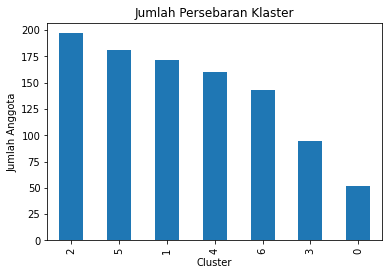

2    197
5    181
1    172
4    160
6    143
3     95
0     52
Name: Cluster, dtype: int64

In [17]:
# visualisasi jumlah tiap cluster
pd.value_counts(students_data['Cluster']).plot.bar()
plt.title('Jumlah Persebaran Klaster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Anggota')
plt.savefig('Jumlah Persebaran Klaster')
plt.show()
students_data['Cluster'].value_counts()

In [18]:
# group rata2 nilai berdasarkan cluster
class_df = students_data.groupby("Cluster")[students_data.columns[-4:-1]].mean()
class_df

,math_score,reading_score,writing_score
Cluster,,,
0,35.634615,38.250000,36.173077
1,79.976744,82.389535,81.186047
2,64.614213,68.015228,67.583756
3,88.631579,92.936842,92.736842
4,59.175000,60.168750,58.843750
5,70.325967,75.580110,74.685083
6,49.888112,52.265734,50.013986


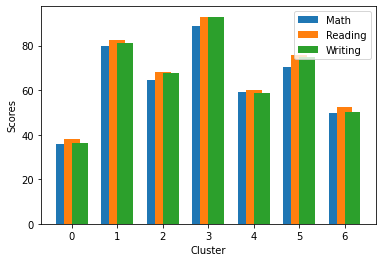

In [19]:
ind = np.arange(7)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math_score, width, label='Math')
rects2 = ax.bar(ind, class_df.reading_score, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing_score, width, label='Writing')

ax.set_xlabel('Cluster')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [20]:
class_df["total_ave_score"] = (class_df.math_score + class_df.reading_score + class_df.writing_score)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank

Cluster
3    91.435088
1    81.184109
5    73.530387
2    66.737733
4    59.395833
6    50.722611
0    36.685897
Name: total_ave_score, dtype: float64

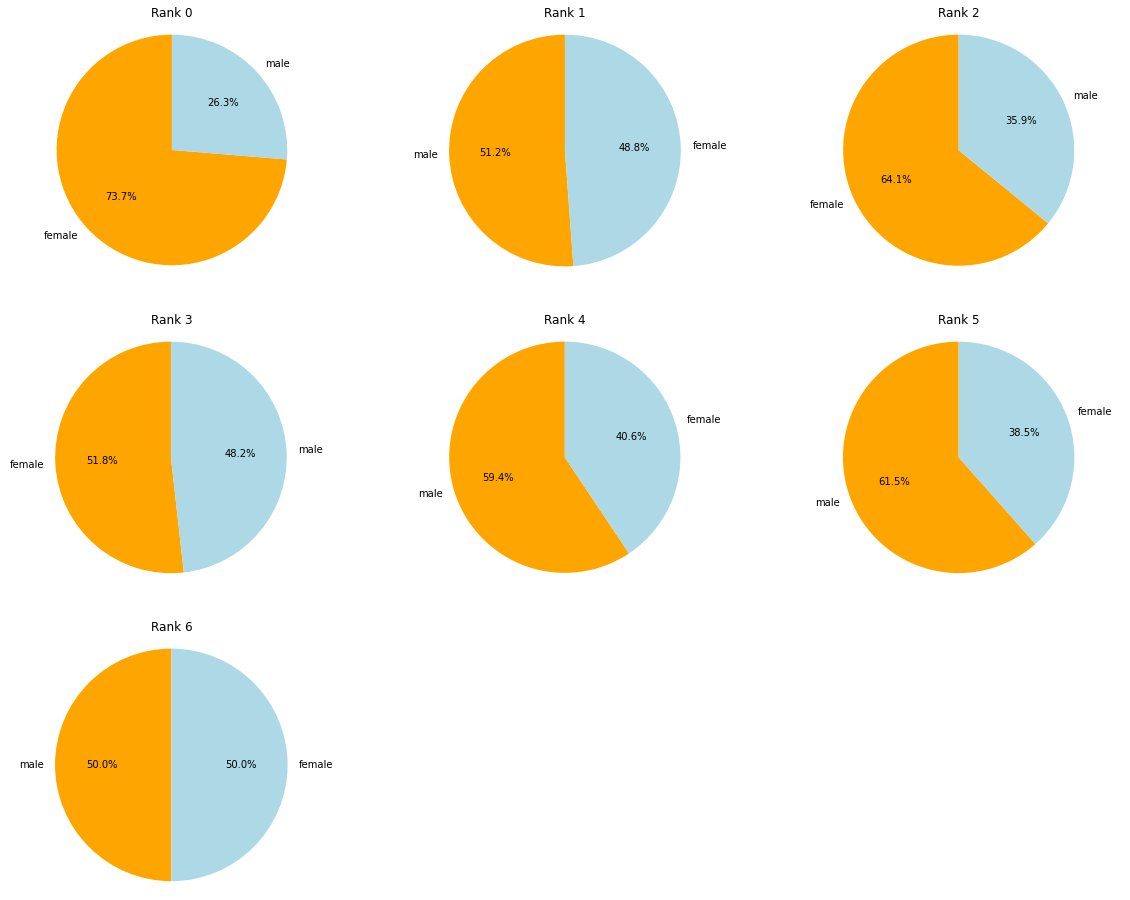

In [29]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown"]
    for idx in range(7):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = students_data[students_data["Cluster"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.savefig(column)
    plt.show()

# plot_pie_chart("parental_level_of_education")
# plot_pie_chart("lunch")
# plot_pie_chart("test_preparation_course")
plot_pie_chart("gender")

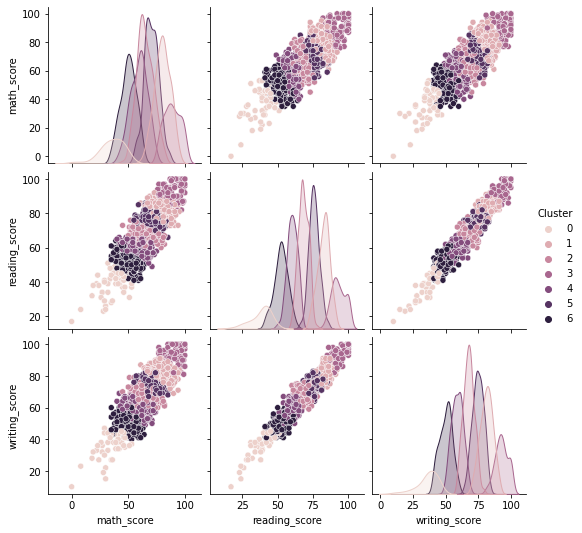

In [22]:
import seaborn as sns

sns.pairplot(students_data, hue='Cluster')